### Import Functions

In [7]:
import train
t = train.Train()

Using TensorFlow backend.


### Train model

In [8]:
# Before doing under cell, DO THIS CELL
from pathlib import Path
Path("data/accuracy.txt").write_text("")

0

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               25728     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 1s 662us/step - loss: 0.4986 - acc

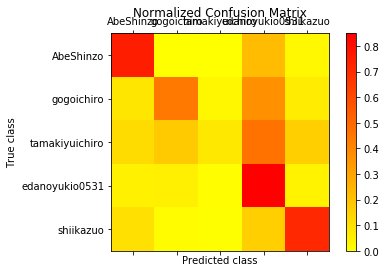

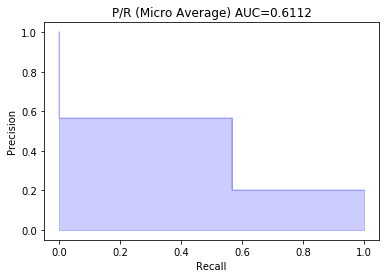

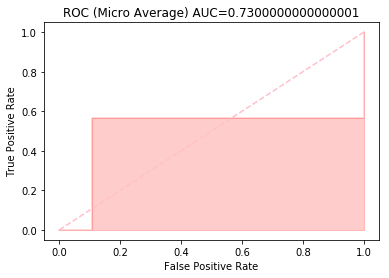

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               25728     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 1s 677us/step - loss: 0.5063 - acc

1750/1750 [==============================] - 1s 349us/step - loss: 0.3440 - acc: 0.8549 - val_loss: 0.3774 - val_acc: 0.8427
Epoch 53/256
1750/1750 [==============================] - 1s 349us/step - loss: 0.3398 - acc: 0.8592 - val_loss: 0.3773 - val_acc: 0.8429
Epoch 54/256
1750/1750 [==============================] - 1s 328us/step - loss: 0.3381 - acc: 0.8579 - val_loss: 0.3739 - val_acc: 0.8488
Epoch 55/256
1750/1750 [==============================] - 1s 331us/step - loss: 0.3347 - acc: 0.8627 - val_loss: 0.3689 - val_acc: 0.8507
Epoch 56/256
1750/1750 [==============================] - 1s 345us/step - loss: 0.3301 - acc: 0.8655 - val_loss: 0.3673 - val_acc: 0.8501
Epoch 57/256
1750/1750 [==============================] - 1s 330us/step - loss: 0.3278 - acc: 0.8653 - val_loss: 0.3638 - val_acc: 0.8531
Epoch 58/256
750/750 [==============================] - 0s 144us/step
[0.37247626948356627, 0.85280003277460736]


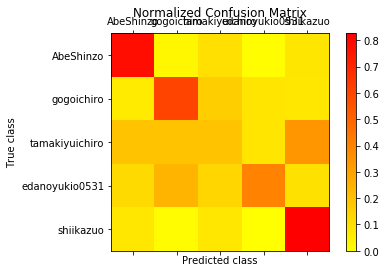

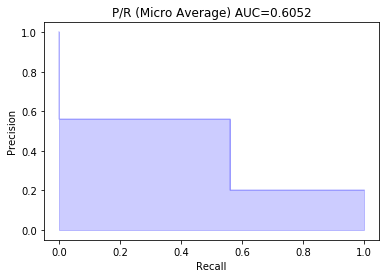

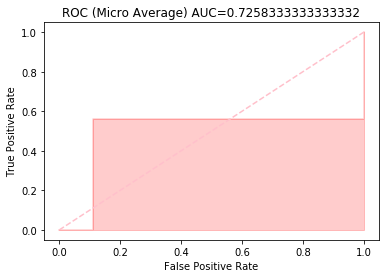

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 1s 723us/step - loss: 0.4996 - acc

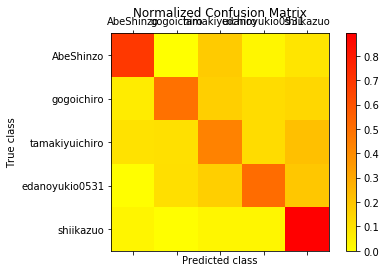

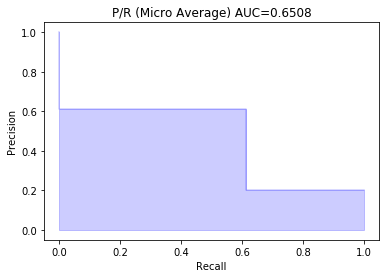

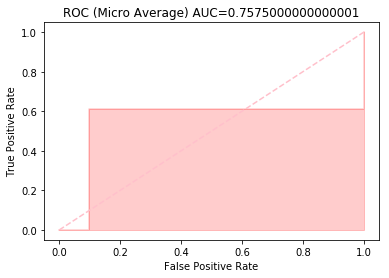

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 1s 783us/step - loss: 0.5068 - acc

1750/1750 [==============================] - 1s 342us/step - loss: 0.3879 - acc: 0.8309 - val_loss: 0.3820 - val_acc: 0.8333
Epoch 53/256
1750/1750 [==============================] - 1s 333us/step - loss: 0.3852 - acc: 0.8319 - val_loss: 0.3791 - val_acc: 0.8323
Epoch 54/256
1750/1750 [==============================] - 1s 331us/step - loss: 0.3824 - acc: 0.8344 - val_loss: 0.3779 - val_acc: 0.8357
Epoch 55/256
1750/1750 [==============================] - 1s 339us/step - loss: 0.3798 - acc: 0.8342 - val_loss: 0.3742 - val_acc: 0.8365
Epoch 56/256
1750/1750 [==============================] - 1s 332us/step - loss: 0.3769 - acc: 0.8347 - val_loss: 0.3719 - val_acc: 0.8389
Epoch 57/256
1750/1750 [==============================] - 1s 344us/step - loss: 0.3745 - acc: 0.8366 - val_loss: 0.3693 - val_acc: 0.8395
Epoch 58/256
1750/1750 [==============================] - 1s 345us/step - loss: 0.3722 - acc: 0.8378 - val_loss: 0.3692 - val_acc: 0.8379
Epoch 59/256
1750/1750 [=======================

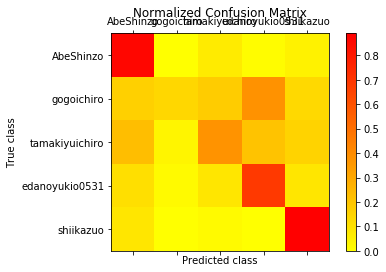

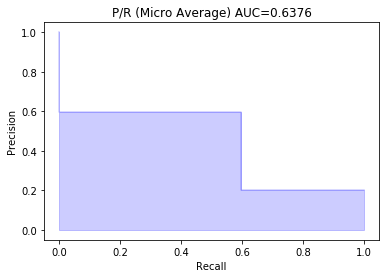

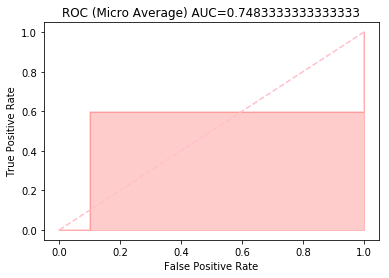

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 1s 831us/step - loss: 0.5030 - acc

Epoch 53/256
1750/1750 [==============================] - 1s 344us/step - loss: 0.3615 - acc: 0.8389 - val_loss: 0.3525 - val_acc: 0.8437
Epoch 54/256
1750/1750 [==============================] - 1s 359us/step - loss: 0.3571 - acc: 0.8406 - val_loss: 0.3502 - val_acc: 0.8507
Epoch 55/256
1750/1750 [==============================] - 1s 329us/step - loss: 0.3529 - acc: 0.8433 - val_loss: 0.3463 - val_acc: 0.8499
Epoch 56/256
1750/1750 [==============================] - 1s 334us/step - loss: 0.3490 - acc: 0.8449 - val_loss: 0.3403 - val_acc: 0.8560
Epoch 57/256
1750/1750 [==============================] - 1s 356us/step - loss: 0.3459 - acc: 0.8473 - val_loss: 0.3383 - val_acc: 0.8557
Epoch 58/256
1750/1750 [==============================] - 1s 349us/step - loss: 0.3422 - acc: 0.8498 - val_loss: 0.3370 - val_acc: 0.8579
Epoch 59/256
1750/1750 [==============================] - 1s 338us/step - loss: 0.3386 - acc: 0.8523 - val_loss: 0.3324 - val_acc: 0.8616
Epoch 60/256
1750/1750 [==========

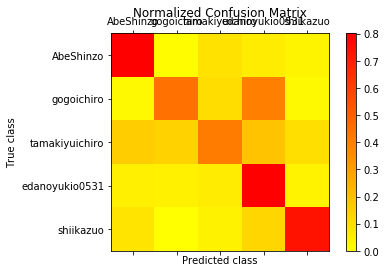

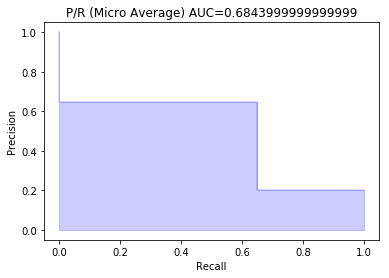

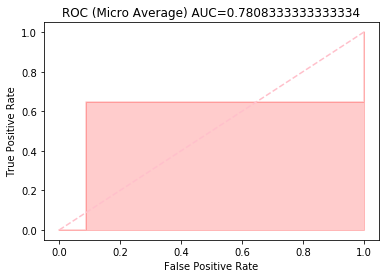

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 2s 875us/step - loss: 0.5094 - acc

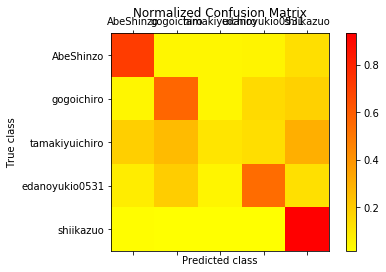

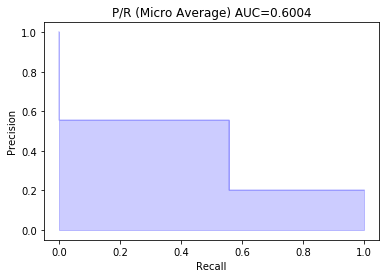

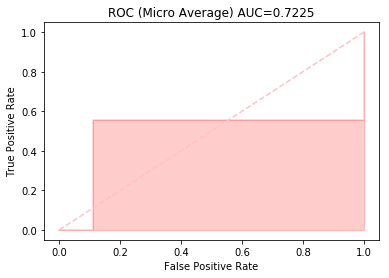

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 2s 915us/step - loss: 0.5098 - acc

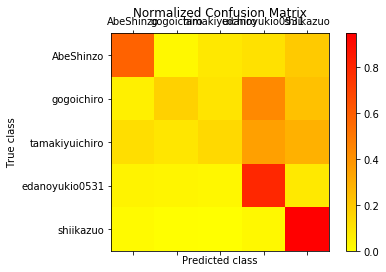

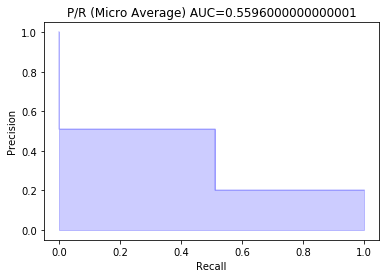

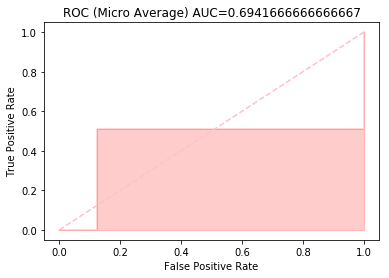

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 2s 949us/step - loss: 0.5063 - acc

1750/1750 [==============================] - 1s 348us/step - loss: 0.3814 - acc: 0.8392 - val_loss: 0.3881 - val_acc: 0.8411
Epoch 53/256
1750/1750 [==============================] - 1s 359us/step - loss: 0.3779 - acc: 0.8409 - val_loss: 0.3879 - val_acc: 0.8405
Epoch 54/256
1750/1750 [==============================] - 1s 346us/step - loss: 0.3748 - acc: 0.8427 - val_loss: 0.3850 - val_acc: 0.8371
Epoch 55/256
1750/1750 [==============================] - 1s 350us/step - loss: 0.3715 - acc: 0.8439 - val_loss: 0.3809 - val_acc: 0.8395
Epoch 56/256
1750/1750 [==============================] - 1s 350us/step - loss: 0.3688 - acc: 0.8466 - val_loss: 0.3781 - val_acc: 0.8469
Epoch 57/256
1750/1750 [==============================] - 1s 351us/step - loss: 0.3647 - acc: 0.8485 - val_loss: 0.3736 - val_acc: 0.8485
Epoch 58/256
750/750 [==============================] - 0s 148us/step
[0.37689356525739032, 0.84053336811065671]


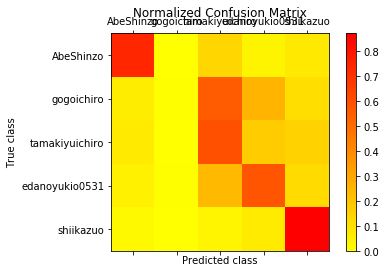

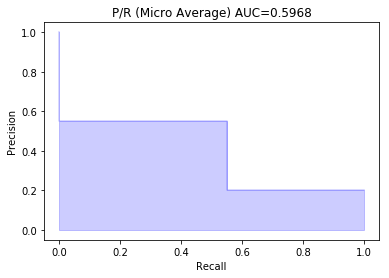

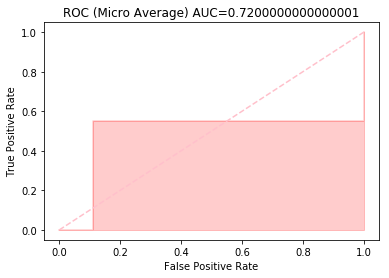

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_44 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_45 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5071 - acc: 

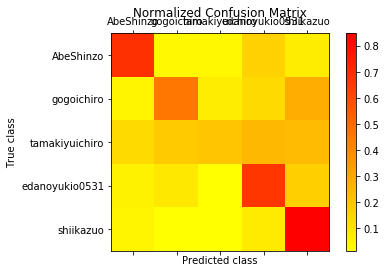

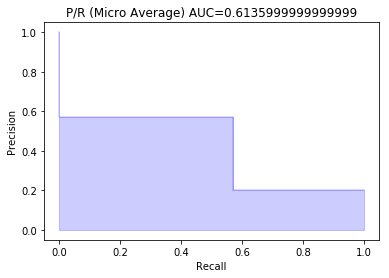

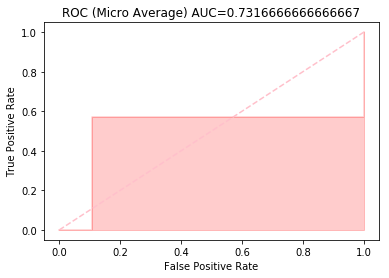

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_49 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_50 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5053 - acc: 

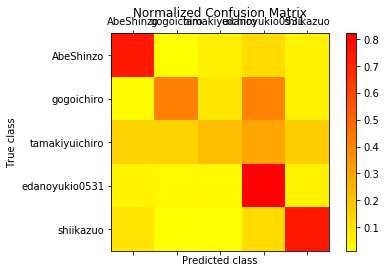

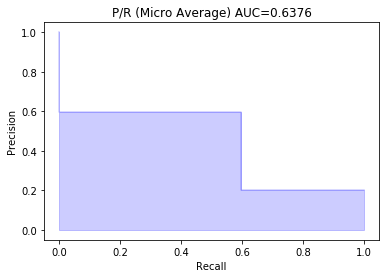

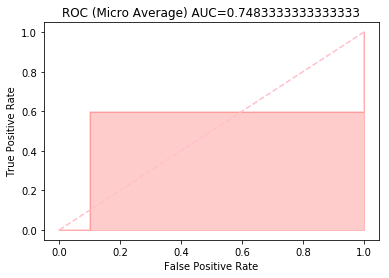

In [9]:
# DO CAREFULLY
i = 10
for i in range(1,i+1):
    t.main(i)

### Analyze Results (Average Comfusion Matrix)

Average Accuracy: 0.846693364255


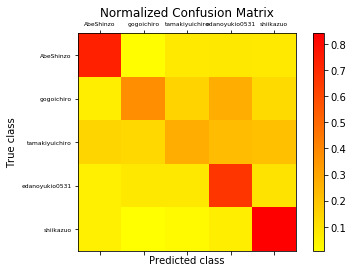

In [10]:
import csv

import numpy as np
import matplotlib.pyplot as plt

politicians = t.get_politicians()

accuracies = []
with open("data/accuracy.txt","r") as f:
    for l in f.readlines():
        accuracies.append(float(l))
print("Average Accuracy:",np.mean(accuracies))
        

cm = []
for i in range(1, i+1):
    cm.append(np.load("data/cm{0}.npy".format(i)))
cm = np.asarray(cm)
cm_a = np.mean(cm,axis=0)

fig = plt.figure()
ax = plt.subplot()
cax = ax.matshow(cm_a, interpolation="nearest", cmap="autumn_r")
fig.colorbar(cax)
ax.set_xticklabels([""]+politicians,fontsize=6)
ax.set_yticklabels([""]+politicians,fontsize=6)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

with open("data/cm.csv","w") as f:
    writer = csv.writer(f,delimiter=",")
    writer.writerows(cm_a)